In [1]:
from tensorflow import keras
from keras import datasets
from numpy import array
from numpy.linalg import norm
import random
import IISL_FLpkg.data_generator as dg
import IISL_FLpkg.model_generator as mg

N = 30

sca_metric = keras.metrics.SparseCategoricalAccuracy(name="sca")
all_models, central_server = mg.model_generation(10, sca_metric, 0)
X, Y = dg.generate_synthetic(0, 0, N, 60, 10, 1)

loss_list = []
accuracy_list = []

x = [[] for _ in range(10)]
y = [[] for _ in range(10)]

for iter in range(200):
    random_numbers = random.sample(range(29),10)
    for i in range(10):
        index = random_numbers[i]
        length = len(X[index])/10 - 1
        sel = random.randint(0, int(length))
        x[i] = X[index][sel*10:(sel+1)*10]
        y[i] = Y[index][sel*10:(sel+1)*10]
           
    results = all_models.fed_prox(x, y, sca_metric, central_server)
    loss_list.append(results[0])
    accuracy_list.append(results[1])
    if((iter+1)%10==0):
        print("[0]loss : %.7f, sca : %.7f" %( results[0], results[1]))

2022-04-26 09:41:10.378495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-26 09:41:10.378588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [60,20] != values[1].shape = [20] [Op:Pack] name: packed

## Result

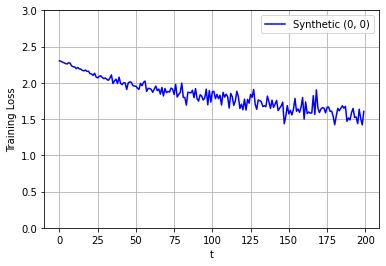

In [9]:
import matplotlib.pyplot as plt

t1 = list(range(len(loss_list)))
y1 = loss_list

# plotting the points
plt.plot(t1, y1, 'blue', label='Synthetic (0, 0)')

plt.ylim([0, 3]) 
plt.legend(ncol = 1)

# naming the x axis
plt.xlabel('t')
# naming the y axis
plt.ylabel('Training Loss')
 
# giving a title to my graph
 
# function to show the plot
plt.grid()
plt.show()

In [6]:
len(all_models1)

10

In [5]:
k=len(X1[0])
for i in range(len(X1)):
    if(k>len(X1[i])):
        k = len(X1[i])
        
print(k)

52


In [11]:
len(X5[30])

IndexError: list index out of range

In [4]:
surv

0

In [68]:
len(x5)

26

temp

In [7]:
len(random_numbers)

10

In [11]:
random_numbers[9]

7

In [6]:
len(x5)

30

In [4]:
x5[23]

array([[-5.74693826e-01,  1.65432452e+00,  9.13801053e-02,
         7.18274102e-01, -7.19330674e-01,  1.13676088e+00,
         1.06177916e+00, -8.64930921e-01, -8.23215482e-01,
         1.55941829e-01,  2.22408312e+00,  8.49800552e-01,
        -8.39895125e-01,  2.28983529e+00, -1.94852511e-01,
         8.27177375e-01, -9.52668945e-01,  1.56655165e-01,
        -5.30583117e-01, -1.21434092e+00, -1.97892514e+00,
        -8.80905612e-01,  7.00564381e-02,  1.70054395e-01,
         1.03035884e+00,  1.35180072e+00,  7.24073271e-01,
         6.66385970e-01,  4.71494151e-02,  7.35150749e-01,
        -4.37471971e-02,  2.47858732e+00,  4.76662109e-01,
        -1.06570315e+00,  2.66491292e-01,  5.77380699e-02,
        -7.22678709e-01,  1.09113269e+00,  2.11150307e+00,
         5.67141830e-01,  1.67586181e+00,  9.42089735e-01,
         1.79247988e+00,  5.16491792e-01, -1.74769395e+00,
        -1.67019536e+00, -4.25705251e-01,  2.26997645e+00,
         2.18702057e-01,  5.95910886e-01, -2.28497760e-0